# clean_dataset
Testing and cleaning the created dataset for class imbalances and checking normalisation of velocity fields.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_prep
import seaborn as sns
from sklearn import model_selection

In [2]:
# loading in complete np.arrays of data
inpath = '/Users/chrisduckworth/projects/ML_portfolio/kin_mis_classification/CNN/pre-processing/raw_dataset_files/'
X = np.load(inpath + 'X_total.npy')
y = np.load(inpath + 'y_total.npy')

### Creating a countplot to check number of classifications for each category:
    - 0 - Do not use
    - 1 - Messy (potentially usable but maps are typically messy and global PAs will have higher errors)
    - 2 - Clean (global PAs are well behaved and well defined)

/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


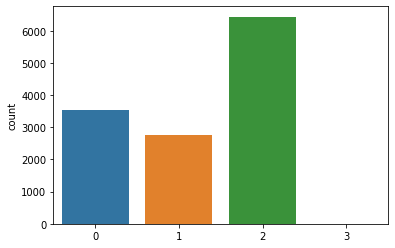

In [3]:
# creating countplot to check for class imbalances.
sns.countplot(y)

From this we see some _fairly_ significant class size imbalances **and** a couple of pieces of data with incorrect labels (i.e. those with class = 3). 
- Removing data with class = 3.

In [5]:
X = X[y < 3] ; y = y[y < 3]

### Checking X to see if there are any maps which have values outside of normalised range of [-1, 1]

In [6]:
print('{}% of pixels in X data have values outside of normalised range.'.format(100 * X.ravel()[(X.ravel() > 1) | (X.ravel() < -1)].shape[0] / X.ravel().shape[0]))

0.5067555147058823% of pixels in X data have values outside of normalised range.


### Removing all maps containing extreme (outside of normalised range) pixel values.

In [7]:
mask = []

for vf in X:
    mask.append(True in (vf.ravel() > 1) | (vf.ravel() < -1))

mask = np.array(mask)

In [8]:
X = X[mask] ; y = y[mask]

### Plotting a random subsample of X.

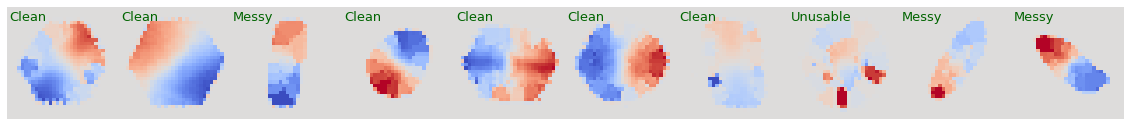

In [19]:
labels = ['Unusable', 'Messy', 'Clean']
fig, ax = plt.subplots(1, 10, figsize=(20, 5), sharex='all', sharey='all')

for axis in ax.ravel():
    ind = np.random.randint(y.shape[0])
    axis.imshow(X[ind,:,:], cmap='coolwarm', vmin=-1, vmax=1)
    axis.axis('off')
    axis.annotate(labels[y[ind]], xy=(0.02, 0.88), xycoords='axes fraction', fontsize = 13, color='darkgreen')

fig.subplots_adjust(hspace=-0.4, wspace=0)
plt.savefig('example_classified_maps.png', format='png', bbox_inches='tight')

### Shuffling remaining data and dividing into training, test and validation datasets.

In [108]:
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

# creating training sample
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 1 - train_ratio)

# creating test and validation training samples.
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_test, y_test, test_size = test_ratio / (test_ratio + validation_ratio)) 

print('There are {} in the training, {} in the test, and {} in the validation datasets.'.format(y_train.shape[0], y_test.shape[0], y_val.shape[0]))

There are 6343 in the training, 2115 in the test, and 2115 in the validation datasets.


### Checking if there are any data imbalances between created datasets.

/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


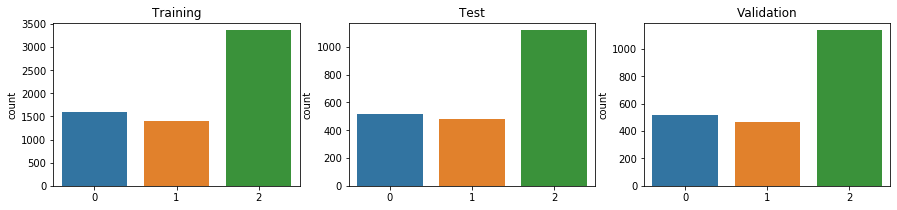

In [117]:
fig, ax = plt.subplots(1,3, figsize=(15, 3))

datasets = [y_train, y_test, y_val]
ds_labels = ['Training', 'Test', 'Validation']

for ind, axis in enumerate(ax.ravel()):
    sns.countplot(datasets[ind], ax=axis)
    axis.set_title(ds_labels[ind])

### Saving created datasets

In [118]:
outpath = '/Users/chrisduckworth/projects/ML_portfolio/kin_mis_classification/CNN/pre-processing/clean_dataset_files/'

np.save(outpath + 'X_train', X_train)
np.save(outpath + 'X_test', X_test)
np.save(outpath + 'X_val', X_val)

np.save(outpath + 'y_train', y_train)
np.save(outpath + 'y_test', y_test)
np.save(outpath + 'y_val', y_val)
